# 분류 모형 : 여행자 보험금을 청구할 고객을 맞혀보자
## 1. 데이터 불러오기

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
travel_insurance = pd.read_csv("https://raw.githubusercontent.com/fintech-data/Revolution/main/data/travel%20insurance.csv")

In [3]:
travel_insurance.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [4]:
travel_insurance.rename(columns={ 'Agency Type':'Agency_Type', 'Distribution Channel':'Distribution_Channel', 'Product Name':'Product_Name',
       'Net Sales':'Net_Sales', 'Commision (in value)':'Commision_in_value'
       },inplace=True)


- Agency: str, 보험 판매점
- Agency Type: str, 판매점 형태
- Distribution Channel: str, 판매 채널
- Product Name : str,  판매 상품 종류
- Duration: str, 보험기간
- Destination: str,  여행국가
- Net Sales: int, 순마진
- Commision (in value): float, 수수료
- Gender: str, 성별
- Age: int, 나이
- Claim : 보험금 청구


# 2. 데이터 전처리

In [5]:
travel_insurance.shape

(63326, 11)

In [6]:
travel_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency_Type           63326 non-null  object 
 2   Distribution_Channel  63326 non-null  object 
 3   Product_Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net_Sales             63326 non-null  float64
 8   Commision_in_value    63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


## 2-1. 결측치 제거

In [7]:
travel_insurance.isnull().sum() #Gender에 결측치가 매우 많음

Agency                      0
Agency_Type                 0
Distribution_Channel        0
Product_Name                0
Claim                       0
Duration                    0
Destination                 0
Net_Sales                   0
Commision_in_value          0
Gender                  45107
Age                         0
dtype: int64

In [8]:
travel_insurance['Gender'].unique() # 성별을 모르는 경우가 매우 많다.

array(['F', nan, 'M'], dtype=object)

In [9]:
# History가 없는 경우 존재 -> NaN 값을 'None'이라는 모른다는 표시의 문자열로 변환
travel_insurance['Gender'] = travel_insurance['Gender'].fillna('None')

In [10]:
travel_insurance.isnull().sum()

Agency                  0
Agency_Type             0
Distribution_Channel    0
Product_Name            0
Claim                   0
Duration                0
Destination             0
Net_Sales               0
Commision_in_value      0
Gender                  0
Age                     0
dtype: int64

## 2-2. 이상치 탐지

In [11]:
travel_insurance.describe()

,Duration,Net_Sales,Commision_in_value,Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
%matplotlib inline

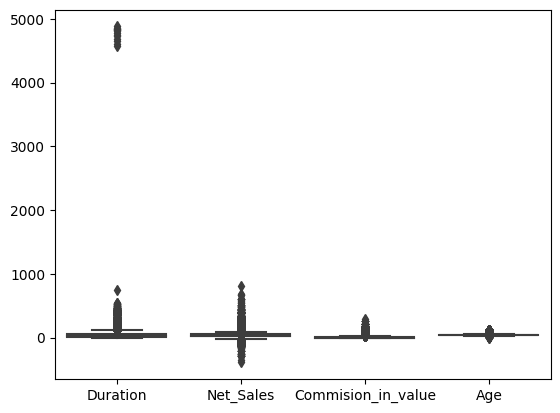

In [13]:
bplot= sns.boxplot(data=travel_insurance) # DURATION에 매우 큰 이상치가 몰려있다.

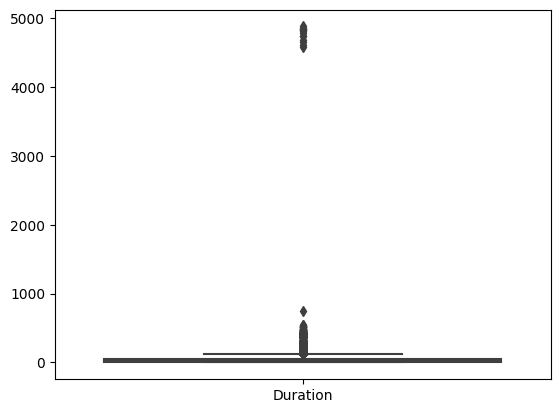

In [14]:
bplot= sns.boxplot(data= travel_insurance[['Duration']])

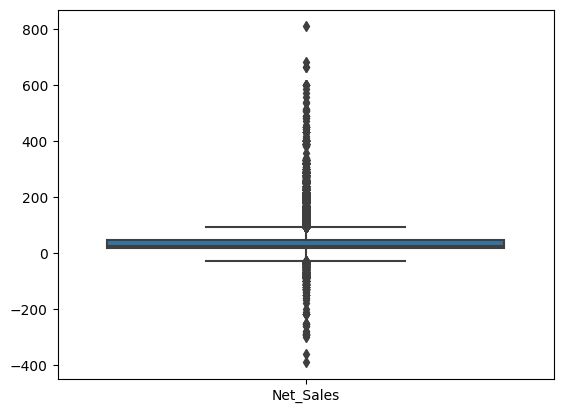

In [15]:
bplot= sns.boxplot(data= travel_insurance[['Net_Sales']])

In [ ]:
bplot= sns.boxplot(data= travel_insurance[['Commision_in_value']])

In [ ]:
bplot= sns.boxplot(data= travel_insurance[['Age']])

##### CHECK : 데이터에 이상치로 보이는 값들이 다수 존재 하지만 실제 고객 데이터 값으로 보고 그대로 진행, 만약에 이상치가 있다면 다음의 코드를 실행해서 이상치를 처리에 활용할 수 있음

In [ ]:
import numpy as np

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    q25 = np.percentile(df[column].values, 25)
    q75 = np.percentile(df[column].values, 75)

    IQR = q75 - q25
    IQR_weight = IQR*weight

    lowest = q25 - IQR_weight
    highest = q75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index

    return outlier_idx

# 3. 탐색적 자료분석 (EDA)

## 3-1 범주형 (빈도분석)

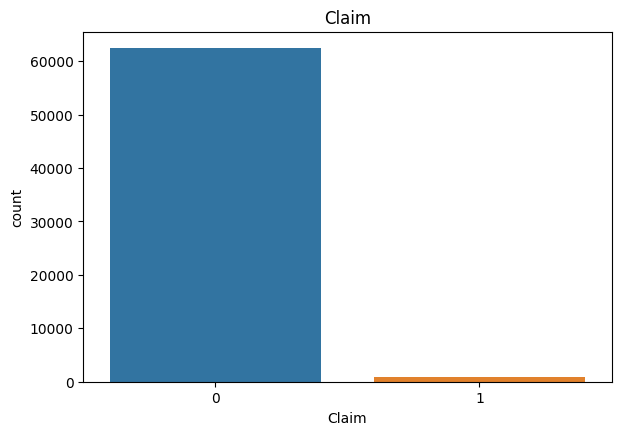

In [65]:
plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,1) #오탈자수정 i->1
    sns.countplot(x = 'Claim', data = travel_insurance)
    plt.title('Claim')

In [ ]:
plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,1)
    sns.countplot(x = 'Agency_Type', data = travel_insurance)
    plt.title('Agency_Type')

In [ ]:
plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,1) #오탈자수정 i->1
    sns.countplot(x = 'Product_Name', data = travel_insurance)
    plt.title('Product_Name ')

In [ ]:
plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,1)
    sns.countplot(x = 'Distribution_Channel', data = travel_insurance)
    plt.title('Distribution_Channel')

In [ ]:
plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,1)
    sns.countplot(x = 'Gender', data = travel_insurance)
    plt.title('Gender')

In [ ]:
plt.figure(figsize=(15,10))

wedges, texts = plt.pie(travel_insurance['Destination'].value_counts(),
                                  labels = travel_insurance['Destination'].unique(),
                                  shadow = True,
                                  textprops = dict(color ="magenta"))


plt.pie(travel_insurance['Destination'].value_counts(),labels=travel_insurance['Destination'].unique())
plt.title('Destination')

In [ ]:
plt.figure(figsize = (10,4))
plt.hist(travel_insurance['Age'],bins=100)
plt.title('Age')
plt.xticks(rotation=90)

## 3-2 종속변수 y

In [ ]:
plt.figure(figsize=[10,10])
sorted_counts= travel_insurance.Claim.value_counts()
plt.pie(sorted_counts, explode=(0.1,0),labels=['No', 'Yes'],
       colors=['#009ACD', '#ADD8E6'], autopct='%1.0f%%',
       shadow=False, startangle=0,
       pctdistance=1.2,labeldistance=1.4)
plt.axis('equal')
plt.title("Number of Travel Claimed vs Non-Claimed")


# : 불균형이 상당히 심한 불균형 데이터
## 1) 평가지표를 f1 score를 사용
## 2) 머신러닝 불균형 해소 방법인 SMOTE 이용

## 3-3. 연속형

In [23]:
travel_insurance.head(2)

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision_in_value,Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71


<Axes: xlabel='Duration', ylabel='Density'>

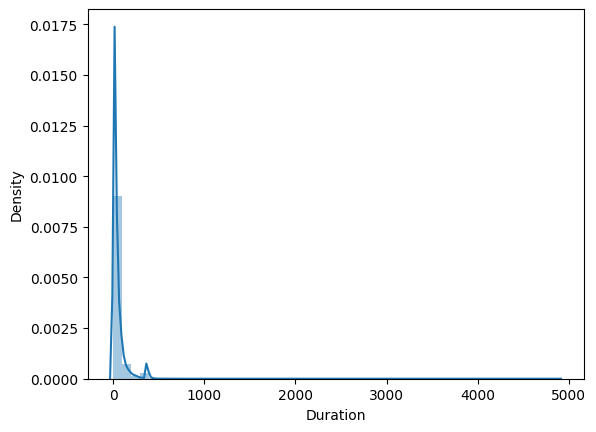

In [ ]:
# 오른쪽으로 꼬리가 긴 분포를 띈다.
sns.distplot(travel_insurance['Duration'])

<Axes: xlabel='Commision_in_value', ylabel='Density'>

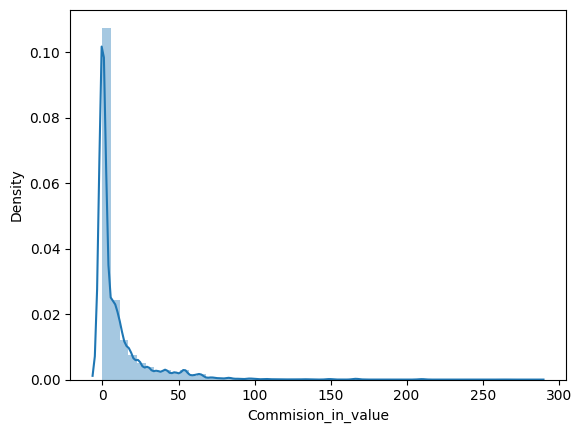

In [24]:
# 0인 경우가 대부분이다
sns.distplot(travel_insurance['Commision_in_value'])

## 3-4. 연속형 독립변수 상관관계

In [26]:
corr = travel_insurance.corr(method = 'pearson')
corr

,Duration,Net_Sales,Commision_in_value,Age
Duration,1.000000,0.429235,0.344772,0.002468
Net_Sales,0.429235,1.000000,0.651315,0.037756
Commision_in_value,0.344772,0.651315,1.000000,0.118348
Age,0.002468,0.037756,0.118348,1.000000


In [ ]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Greens')

In [ ]:
# hue 옵션으로 구분해서 볼수도 있다. (시간이 다소 걸림)
sns.pairplot(data=travel_insurance,hue="Claim")
plt.show()
plt.close()

# 3. 모델링
- 이진분류 모델링 : 근접이웃모형 (보험금 청구 여부, Claim이 0 또는 1)

## 3-1 모델링을 위한 전처리
- 이진분류 모델링 : 근접이웃모형 (보험금 청구 여부, Claim이 0 또는 1)

In [30]:
# 일단 범주형 변수를 원핫인코딩 한다
# 예) 남성, 여성 -> 0, 1로 바꿈

from sklearn import preprocessing
label_encoder1 = preprocessing.LabelEncoder()
travel_insurance['Agency']= label_encoder1.fit_transform(travel_insurance['Agency'])

label_encoder2 = preprocessing.LabelEncoder()
travel_insurance['Agency_Type']= label_encoder2.fit_transform(travel_insurance['Agency_Type'])

label_encoder3 = preprocessing.LabelEncoder()
travel_insurance['Distribution_Channel']= label_encoder3.fit_transform(travel_insurance['Distribution_Channel'])

label_encoder4 = preprocessing.LabelEncoder()
travel_insurance['Product_Name']= label_encoder4.fit_transform(travel_insurance['Product_Name'])

label_encoder5 = preprocessing.LabelEncoder()
travel_insurance['Claim']= label_encoder5.fit_transform(travel_insurance['Claim'])

label_encoder6 = preprocessing.LabelEncoder()
travel_insurance['Destination']= label_encoder6.fit_transform(travel_insurance['Destination'])

In [31]:
column_names = ["Agency", "Agency_Type", "Distribution_Channel","Product_Name","Duration","Destination","Net_Sales","Commision_in_value","Age","Claim"]
travel_insurance = travel_insurance.reindex(columns=column_names)

In [32]:
y= travel_insurance.iloc[:,[-1]]
X= travel_insurance.drop(y.columns,axis = 1)

## 3-2 데이터 분할
- 훈련세트, 테스트 세트에서 보험금청구(claim)의 비중이 동일하도록 조정 : stratify 사용

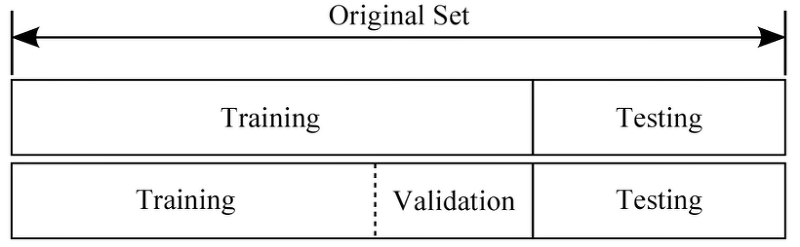

In [44]:
#데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41, stratify=y['Claim'])
#Random state값을 다르게 해도 정확도가 비슷하게 나옴

# 4. 불균형 상태(claim=1, 전체 보험금 청구가 1% 수준인 데이터 셋)
- 이진분류 모델링 : 근접이웃모형 (보험금 청구 여부, Claim이 0 또는 1)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
kn.fit(X_train, y_train)
kn.score(X_test, y_test)
# 정확도가 90% 넘는데 이 세션 왜 한 걸까?


## 보험금 청구한 "데이터 세트"만 뽑아서 보자

In [46]:
#claim이 1인 즉 보험금을 청구한 데이터 세트
X_test_claim_1 = X_test[y_test['Claim'] == 1]
y_test_claim_1 = y_test[y_test['Claim'] == 1]

In [ ]:
X_test_claim_1

In [ ]:
y_test_claim_1

In [ ]:
#보험금을 청구한 케이스만가지고 예측해 본다
kn.predict(X_test_claim_1)

# 5. 균형 상태(claim=1, 전체 보험금 청구가 50% 수준인 데이터 셋)
- 이진분류 모델링 : 근접이웃모형 (보험금 청구 여부, Claim이 0 또는 1)

In [53]:
# 일단 범주형 변수를 원핫인코딩 한다
# 예) 남성, 여성 -> 0, 1로 바꿈

from sklearn import preprocessing
label_encoder1 = preprocessing.LabelEncoder()
travel_insurance['Agency']= label_encoder1.fit_transform(travel_insurance['Agency'])

label_encoder2 = preprocessing.LabelEncoder()
travel_insurance['Agency_Type']= label_encoder2.fit_transform(travel_insurance['Agency_Type'])

label_encoder3 = preprocessing.LabelEncoder()
travel_insurance['Distribution_Channel']= label_encoder3.fit_transform(travel_insurance['Distribution_Channel'])

label_encoder4 = preprocessing.LabelEncoder()
travel_insurance['Product_Name']= label_encoder4.fit_transform(travel_insurance['Product_Name'])

label_encoder5 = preprocessing.LabelEncoder()
travel_insurance['Claim']= label_encoder5.fit_transform(travel_insurance['Claim'])

label_encoder6 = preprocessing.LabelEncoder()
travel_insurance['Destination']= label_encoder6.fit_transform(travel_insurance['Destination'])

In [54]:
column_names = ["Agency", "Agency_Type", "Distribution_Channel","Product_Name","Duration","Destination","Net_Sales","Commision_in_value","Age","Claim"]
travel_insurance = travel_insurance.reindex(columns=column_names)

In [55]:
y= travel_insurance.iloc[:,[-1]]
X= travel_insurance.drop(y.columns,axis = 1)

In [56]:
# ! pip install imblearn
# 불균형 데이터를 다루기 위한 패키지
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')
print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (63326, 9)
Shape of X after SMOTE: (124798, 9)

Balance of positive and negative classes (%):


Claim
0        50.0
1        50.0
dtype: float64

In [57]:
X_sm.columns

Index(['Agency', 'Agency_Type', 'Distribution_Channel', 'Product_Name',
       'Duration', 'Destination', 'Net_Sales', 'Commision_in_value', 'Age'],
      dtype='object')

In [58]:
#데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [60]:
kn.fit(X_train, y_train)
kn.score(X_test, y_test)

0.9399439102564102

In [ ]:
#claim이 1인 즉 보험금을 청구한 데이터 세트
X_test_claim_1 = X_test[y_test['Claim'] == 1]
y_test_claim_1 = y_test[y_test['Claim'] == 1]

In [ ]:
X_test_claim_1

In [ ]:
y_test_claim_1

In [ ]:
#보험금을 청구한 케이스만가지고 예측해 본다
k1=kn.predict(X_test_claim_1)
print(k1)

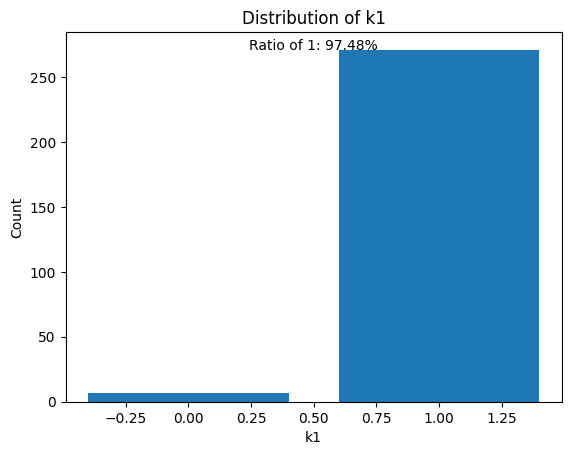

In [64]:
df_k1 = pd.DataFrame(k1, columns=['k1'])

# 클래스별 데이터 개수 계산
counts = df_k1['k1'].value_counts()

# 1의 비율 계산
ratio = counts[1] / len(df_k1) * 100

# 막대 그래프 그리기
plt.bar(counts.index, counts.values)

# 비율 정보 텍스트 추가
plt.text(0.5, max(counts.values), f"Ratio of 1: {ratio:.2f}%", ha='center')

# 그래프에 제목과 축 레이블 추가
plt.title("Distribution of k1")
plt.xlabel("k1")
plt.ylabel("Count")

# 그래프 보여주기
plt.show()

#5. 균형 상태(claim=1, 전체 보험금 청구를 확률 함수 형태로 수정한 모형)
이진분류 모델링 : 근접이웃모형 (보험금 청구 여부, Claim이 0 또는 1)

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

# Calculate the desired ratio for minority class (e.g., 50%)
desired_ratio = 0.5

# Calculate the number of samples needed for the minority class
minority_count = np.sum(y == 1)
majority_count = np.sum(y == 0)
minority_samples_needed = int(majority_count * desired_ratio - minority_count)

# Apply SMOTE with the desired ratio using sampling_strategy argument
sm = SMOTE(sampling_strategy={1: minority_samples_needed}, random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)


print(f'Shape of X before SMOTE: {X.shape}')
print(f'Shape of X after SMOTE: {X_sm.shape}\n')

# Calculate the percentage of positive and negative classes
y_sm_series = pd.Series(y_sm.squeeze())  # y_sm을 시리즈 형태로 변환
y_sm_percentage = y_sm_series.value_counts(normalize=True) * 100
print('Balance of positive and negative classes (%):')
print(y_sm_percentage)


In [ ]:
X_sm.columns

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
kn.fit(X_train, y_train)
kn.score(X_test, y_test)

In [ ]:
#claim이 1인 즉 보험금을 청구한 데이터 세트
X_test_claim_1 = X_test[y_test['Claim'] == 1]
y_test_claim_1 = y_test[y_test['Claim'] == 1]

In [ ]:
X_test_claim_1

In [ ]:
y_test_claim_1

In [ ]:
#보험금을 청구한 케이스만가지고 예측해 본다
k2=kn.predict(X_test_claim_1)
print(k2)

In [ ]:
df_k2 = pd.DataFrame(k2, columns=['k2'])


# 1의 비율 계산
ratio = counts[1] / len(df_k2) * 100

# 막대 그래프 그리기
plt.bar(counts.index, counts.values)

# 비율 정보 텍스트 추가
plt.text(0.5, max(counts.values), f"Ratio of 1: {ratio:.2f}%", ha='center')

# 그래프에 제목과 축 레이블 추가
plt.title("Distribution of k2")
plt.xlabel("k2")
plt.ylabel("Count")

# 그래프 보여주기
plt.show()
